In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import *
from sklearn.model_selection import train_test_split


data = pd.read_csv("./data/AIDS_Classification.csv")
data.head(1)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0


## Scatterplots couples of variables

### Continuous features

In [3]:
continuous_features = [col for col in data.columns if data[col].nunique() > 4]
print(continuous_features)

categorical_features = [col for col in data.columns if col not in continuous_features]
print(categorical_features)

['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']
['trt', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'infected']


In [4]:
len(categorical_features)

15

## Offtrt vs categorical features

### Mosaicplots

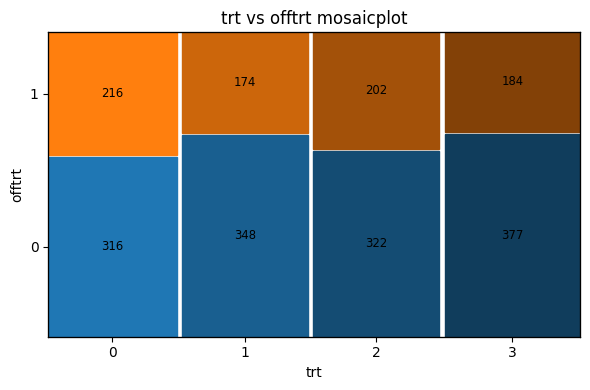

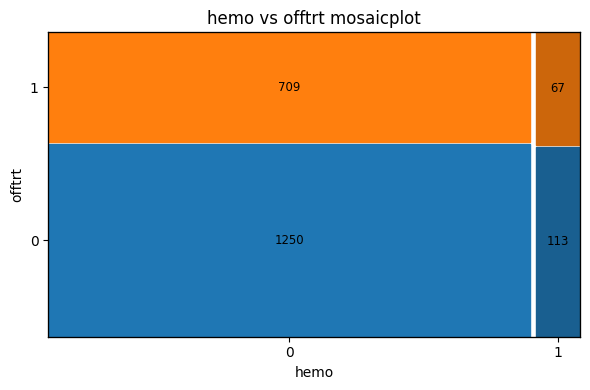

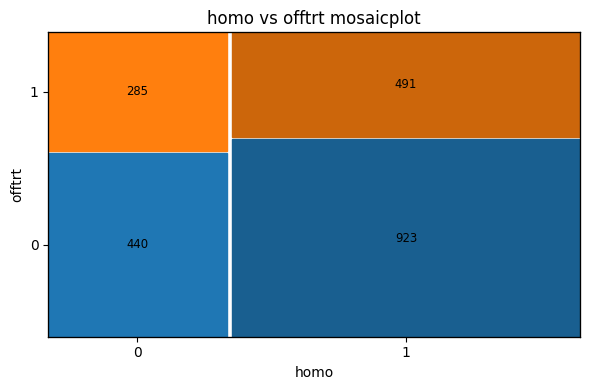

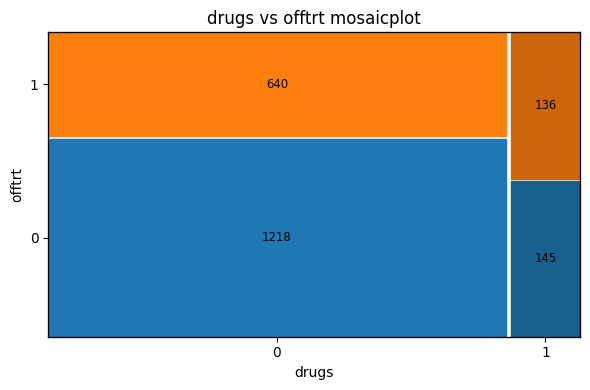

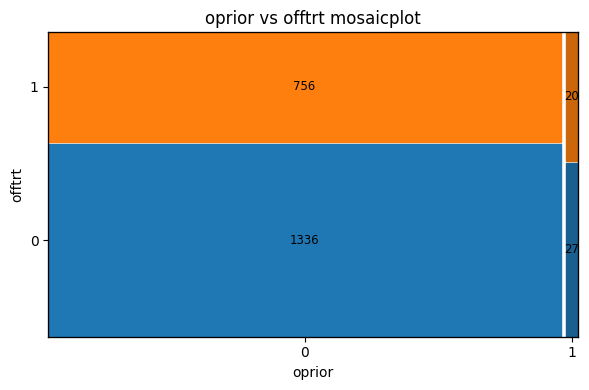

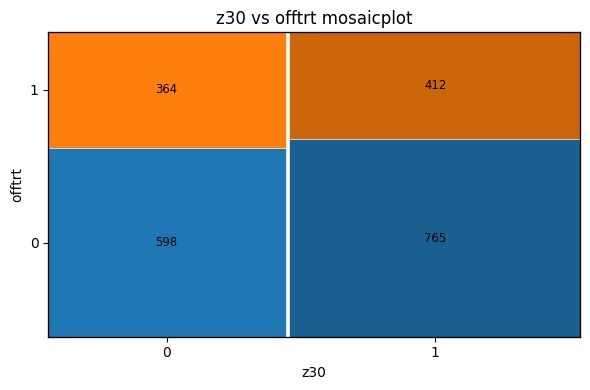

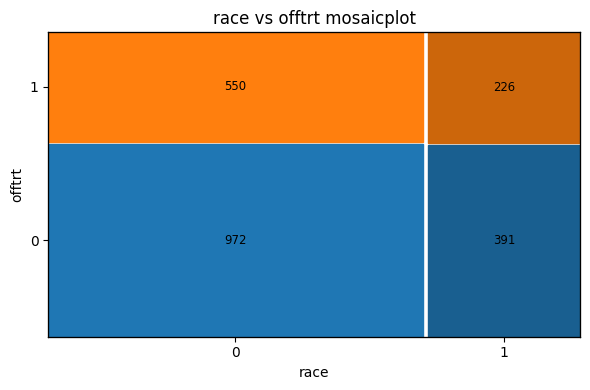

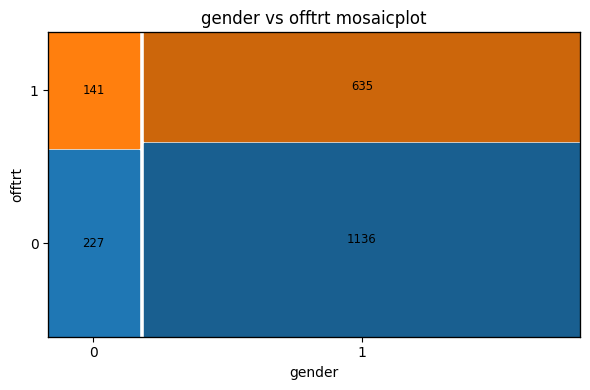

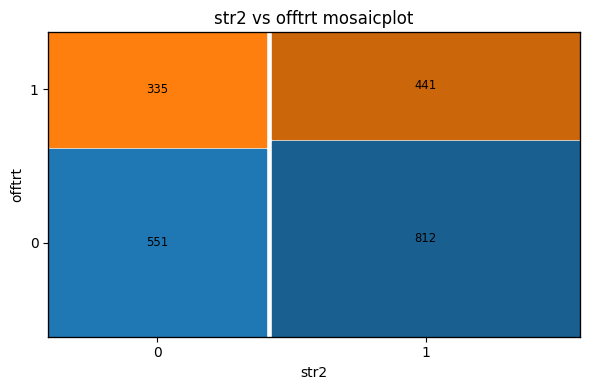

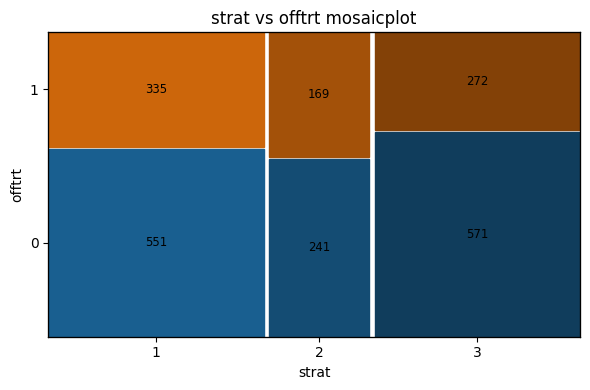

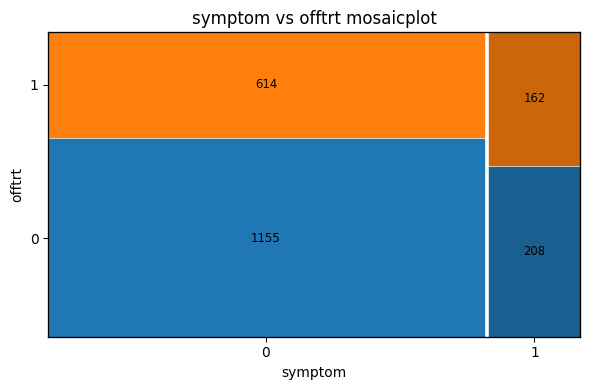

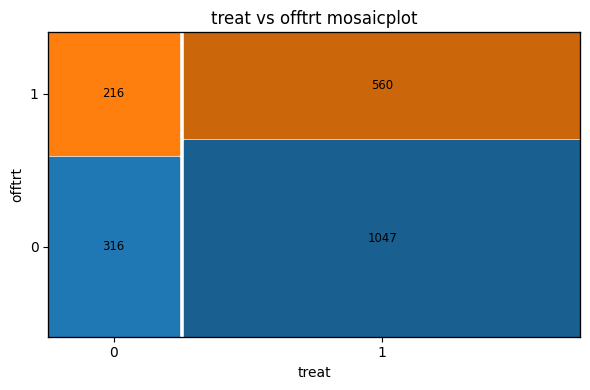

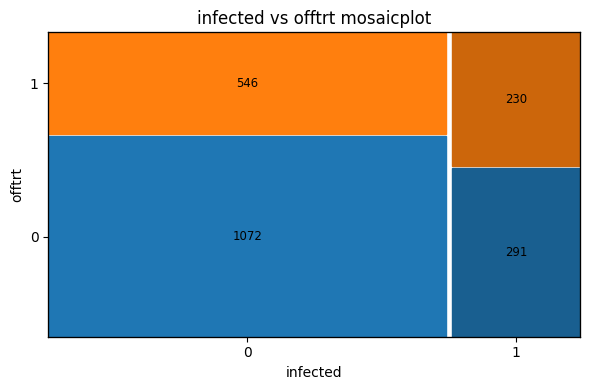

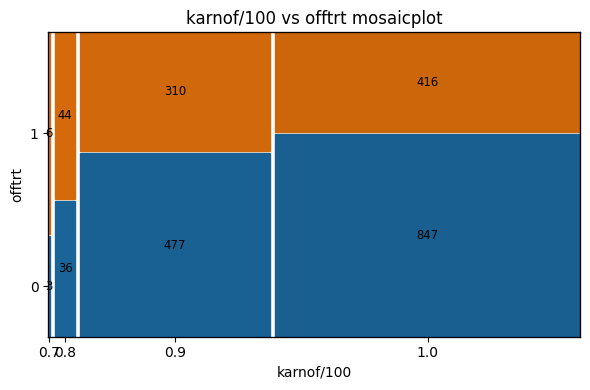

In [9]:
from statsmodels.graphics.mosaicplot import mosaic

def mosaic_colors(key):
    colors = sns.color_palette()
    infected = int(key[1])
    variable = float(key[0])
    base_color_rgb = colors[0] if infected == 0 else colors[1]
    scale_color = (0.8)**variable
    return_color = [x*scale_color for x in base_color_rgb]
    return {'color': return_color}


df = data.copy()
df['karnof/100'] = df['karnof']/100 # for the color of mosaicplot

categorical_features = [col for col in data.columns if col not in continuous_features]

categorical_features.remove('offtrt')

categorical_features.remove('karnof')
categorical_features.append('karnof/100')
for variable in categorical_features:
    fig,axes = plt.subplots(1,1,figsize = (6,4), sharey = False)

    if variable != "karnof/100":
        mosaic(df.sort_values(by=[variable,"offtrt"]), [variable,'offtrt'], axes_label = True, gap = 0.01, ax = axes,
            properties = mosaic_colors,
            labelizer = lambda key : str(df.groupby([variable,'offtrt']).size()[int(key[0]),int(key[1])])
        )
    else:
        mosaic(df.sort_values(by=[variable,"offtrt"]), [variable,'offtrt'], axes_label = True, gap = 0.01, ax = axes,
            properties = mosaic_colors,
            labelizer = lambda key : str(df.groupby([variable,'offtrt']).size()[float(key[0]),float(key[1])])
        )


    #axes[0].set_title(f'{variable} vs infected count')
    axes.set_title(f'{variable} vs offtrt mosaicplot')
    axes.set_xlabel(f"{variable}")
    axes.set_ylabel("offtrt")
    #axes[2].set_title(f'{variable} vs infected violinplot')

    plt.tight_layout()
    plt.show()

### Chisquares

In [20]:
data['offtrt'].value_counts()

n = data['offtrt'].count()

In [25]:
data['join'] = data['offtrt']*10 + data['race']
data['join'].value_counts()

join
0     972
10    550
1     391
11    226
Name: count, dtype: int64

[np.float64(0.4534077499698928), np.float64(0.18380590126900387), np.float64(0.25813970211051857), np.float64(0.10464664665058473)]
join
0     0.454418
10    0.257129
1     0.182796
11    0.105657
Name: count, dtype: float64


In [30]:
categorical_features

['trt',
 'hemo',
 'homo',
 'drugs',
 'karnof',
 'oprior',
 'z30',
 'race',
 'gender',
 'str2',
 'strat',
 'symptom',
 'treat',
 'infected',
 'join']

In [45]:
from scipy import stats


categorical_features = [col for col in data.columns if col not in continuous_features]
categorical_features.remove('offtrt')
categorical_features.remove('join')



for col in categorical_features:

    data['join'] = data['offtrt']*1000 + data[col]
    observed_frequencies = data['join'].value_counts().sort_index()

    marginal_offtrt = data['offtrt'].value_counts() #probably need to sort this as well
    marginal_col = data[col].value_counts()

    expected_frequencies = [a*b/n for a in marginal_offtrt for b in marginal_col]

    # Perform the chi-squared test
    chi2, p = stats.chisquare(list(observed_frequencies), f_exp=expected_frequencies)

    print(col, "Chi-squared test statistic:", chi2, "p-value:", p)

trt Chi-squared test statistic: 14.92868045648683 p-value: 0.036924561419262585
hemo Chi-squared test statistic: 0.07569672009217951 p-value: 0.9945850636836601
homo Chi-squared test statistic: 994.8772473177602 p-value: 2.324937833094543e-215
drugs Chi-squared test statistic: 20.555897518610763 p-value: 0.00013017188121623483
karnof Chi-squared test statistic: 183741.9020244049 p-value: 0.0
oprior Chi-squared test statistic: 0.81842151668859 p-value: 0.8450559650499294
z30 Chi-squared test statistic: 89.16307616942925 p-value: 3.313660212241005e-19
race Chi-squared test statistic: 0.04600587269055965 p-value: 0.9974114737591927
gender Chi-squared test statistic: 6461.202490902081 p-value: 0.0
str2 Chi-squared test statistic: 261.0474891252454 p-value: 2.6681608412277824e-56
strat Chi-squared test statistic: 694.7762602676398 p-value: 6.617777626479239e-148
symptom Chi-squared test statistic: 10.901023968696173 p-value: 0.01227329437099009
treat Chi-squared test statistic: 2897.0711190

In [42]:
expected_frequencies

[np.float64(1031.0116877045348),
 np.float64(331.98831229546516),
 np.float64(586.9883122954652),
 np.float64(189.01168770453484)]

In [44]:
list(observed_frequencies)

[1072, 291, 546, 230]

In [55]:
observed_frequencies.index

Index([0, 1, 1000, 1001], dtype='int64', name='join')

### Offtrt vs categorical and infected

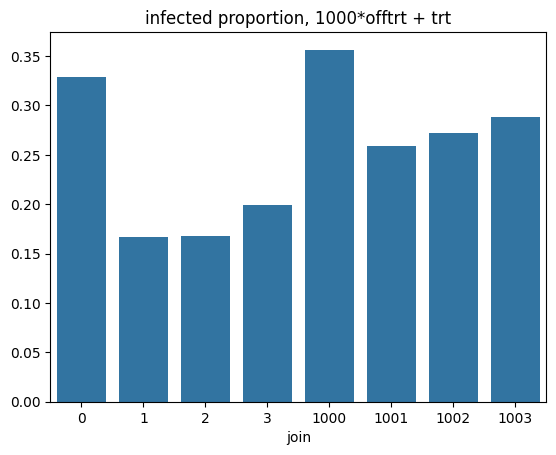

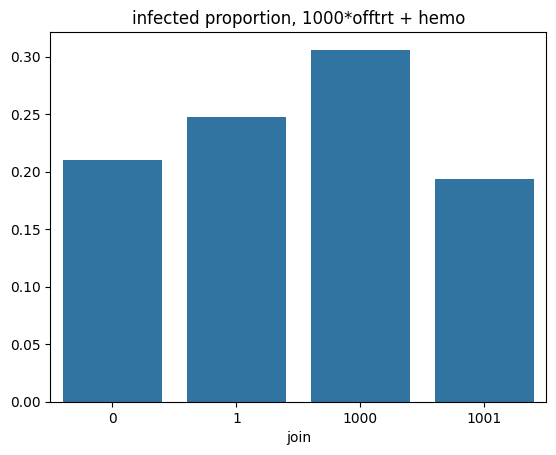

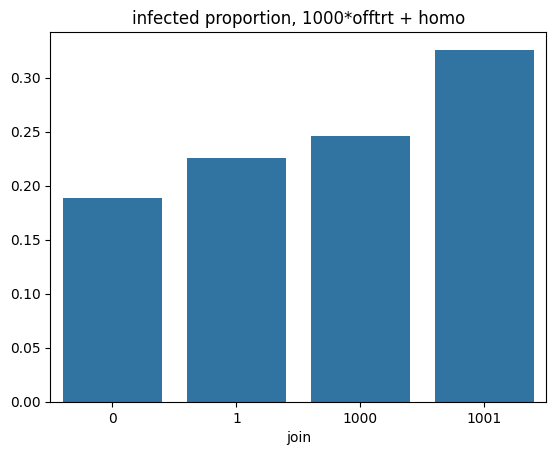

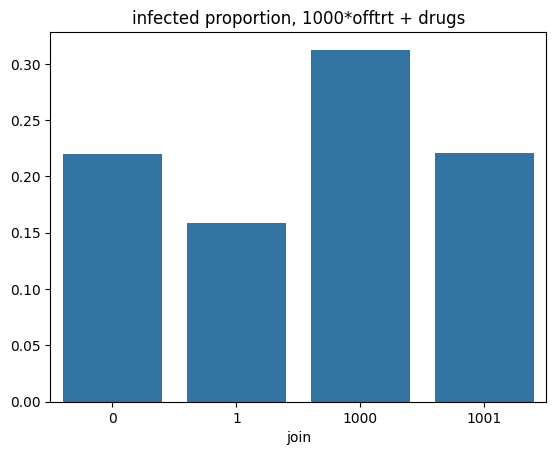

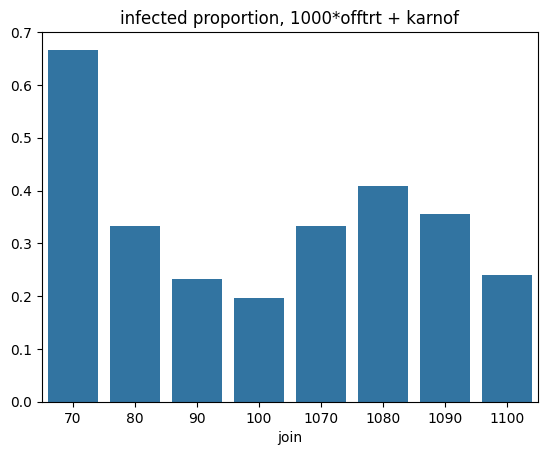

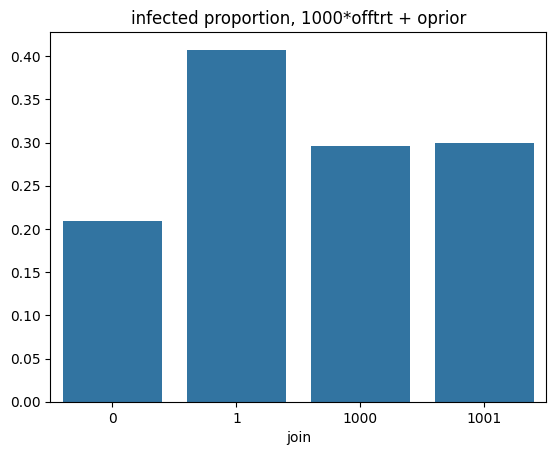

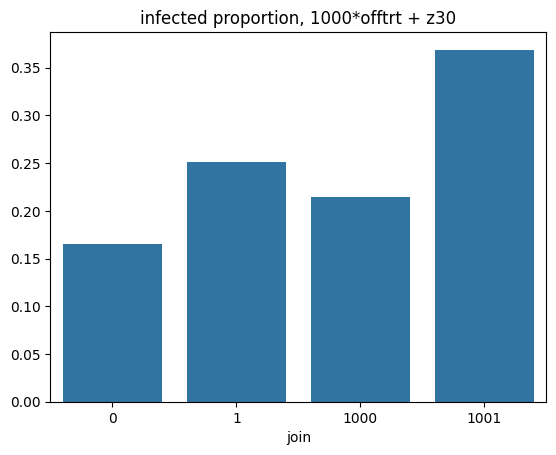

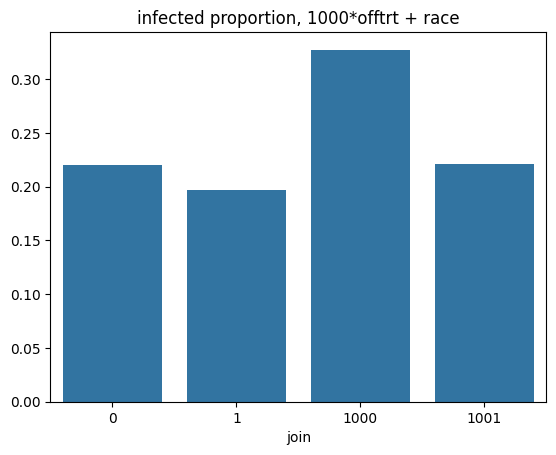

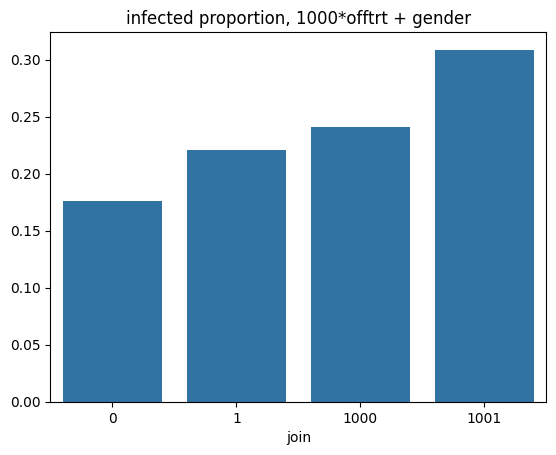

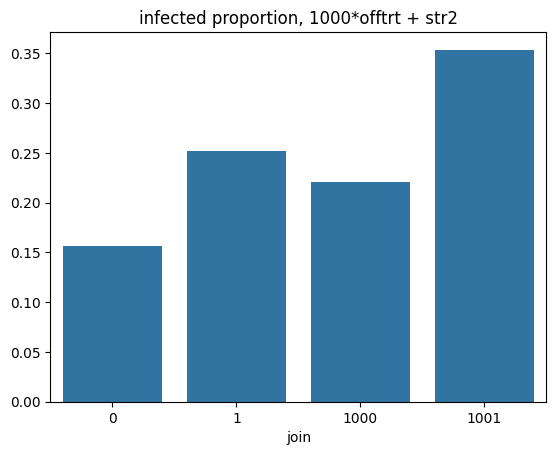

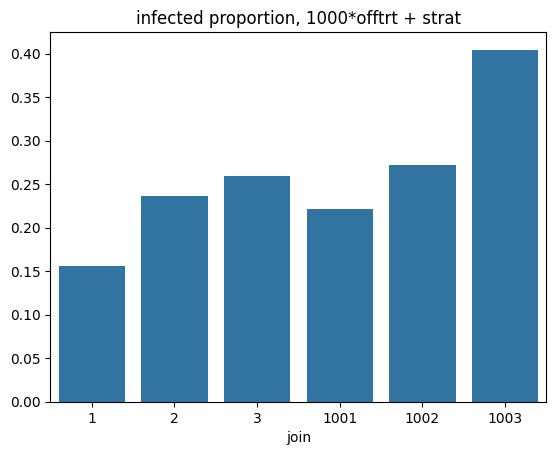

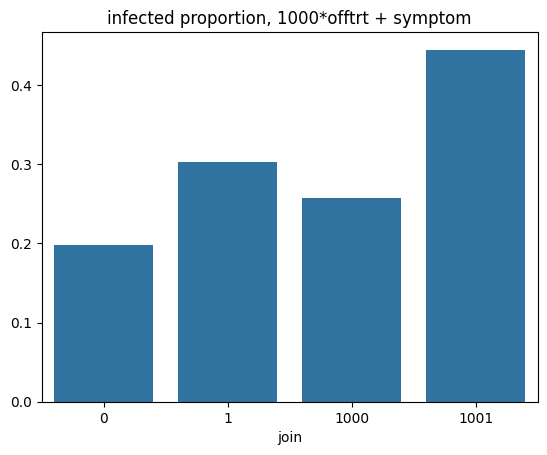

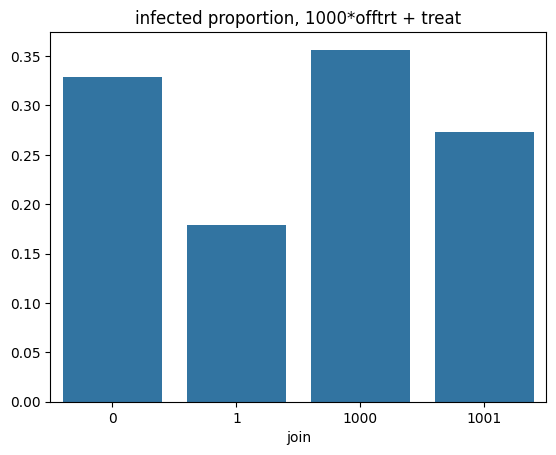

ValueError: All arrays must be of the same length

In [59]:
from scipy import stats


categorical_features = [col for col in data.columns if col not in continuous_features]
categorical_features.remove('offtrt')
categorical_features.remove('join')


df = data.copy()

for col in categorical_features:

    df['join'] = df['offtrt']*1000 + df[col]
    total_observed_frequencies = df['join'].value_counts().sort_index()

    infected_observed_frequencies = df[df['infected']==1]['join'].value_counts().sort_index()

    infected_observed_proportions = [b/a for a,b in zip(total_observed_frequencies,infected_observed_frequencies)]

    sns.barplot(y = infected_observed_proportions, x = total_observed_frequencies.index )
    plt.title(f"infected proportion, 1000*offtrt + {col}")
    plt.show()
    #print(infected_observed_proportions)

## offtrt time

In [61]:
import src.datasets as datasets

In [62]:
data = datasets.data_original()

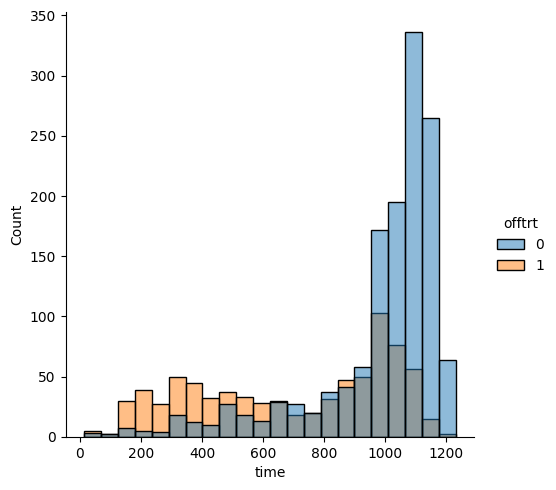

In [63]:
sns.displot(data = data, x = "time", hue = "offtrt")
plt.show()

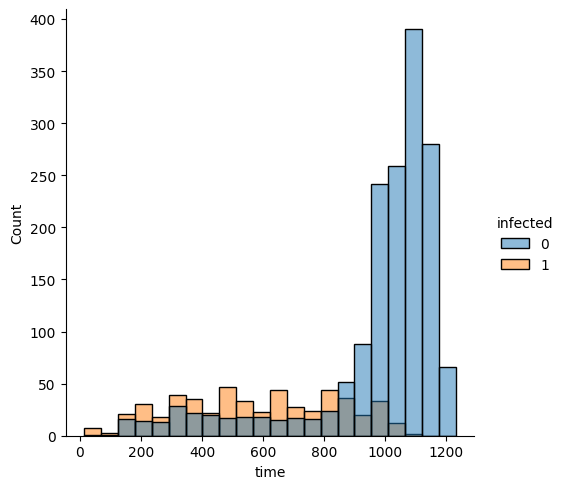

In [64]:
sns.displot(data = data, x = "time", hue = "infected")
plt.show()

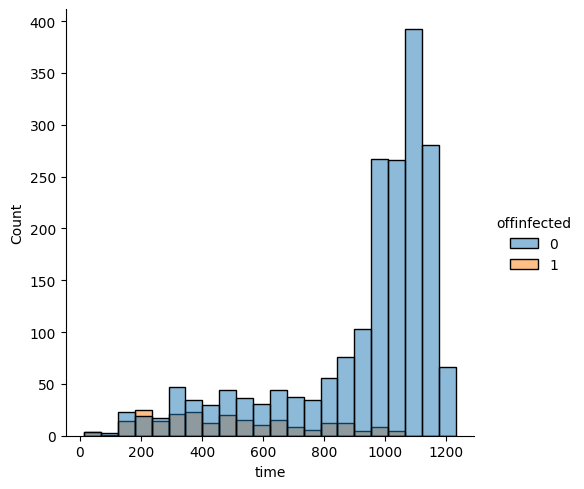

In [65]:
df = data.copy()
df["offinfected"] = df['infected']*df['offtrt']
sns.displot(data = df, x = "time", hue = "offinfected")
plt.show()

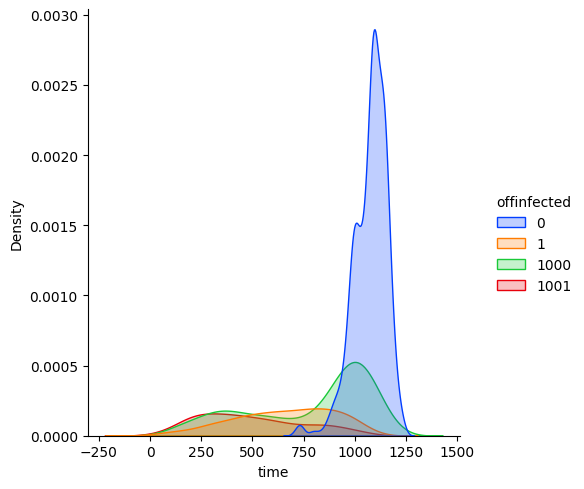

In [72]:
df = data.copy()
df["offinfected"] = df['infected'] + 1000*df['offtrt']
sns.displot(data = df, x = "time", hue = "offinfected", kind = "kde", fill = True, palette=sns.color_palette('bright')[:4])
plt.show()

Not offtrt
If not infected and not offtrt: time >700 by default, modal around 3 years.
If not offtrt but infected: time is monomodal around 2 years.

Offtrt
If not infected: bimodal 1 year and 3 years.
If infected: monomodal 1 year, but can be later.

Time730 and offtrt:, 
 almost surely not infected,  the more hte better.

Time730 and not offtrt:
 the more time, the less infected. --------------> time*(1-offtrt)

Timecensored and offtrt
 50 50
Timecensored and not offtrt
 100% infected


The 


In [103]:
#censored and not offtrt
df = data.copy()
mask = df['time']<800
mask2 = df['offtrt'] == 0 
dm = df[mask & mask2]

In [104]:
dm['infected'].value_counts()

infected
1    189
0     12
Name: count, dtype: int64

In [71]:
96*7

672

One also needs to isolate those people that had time around 707 730 753, and not offtrt. There is a spike of not-infected

## Scatterplot couples of variables

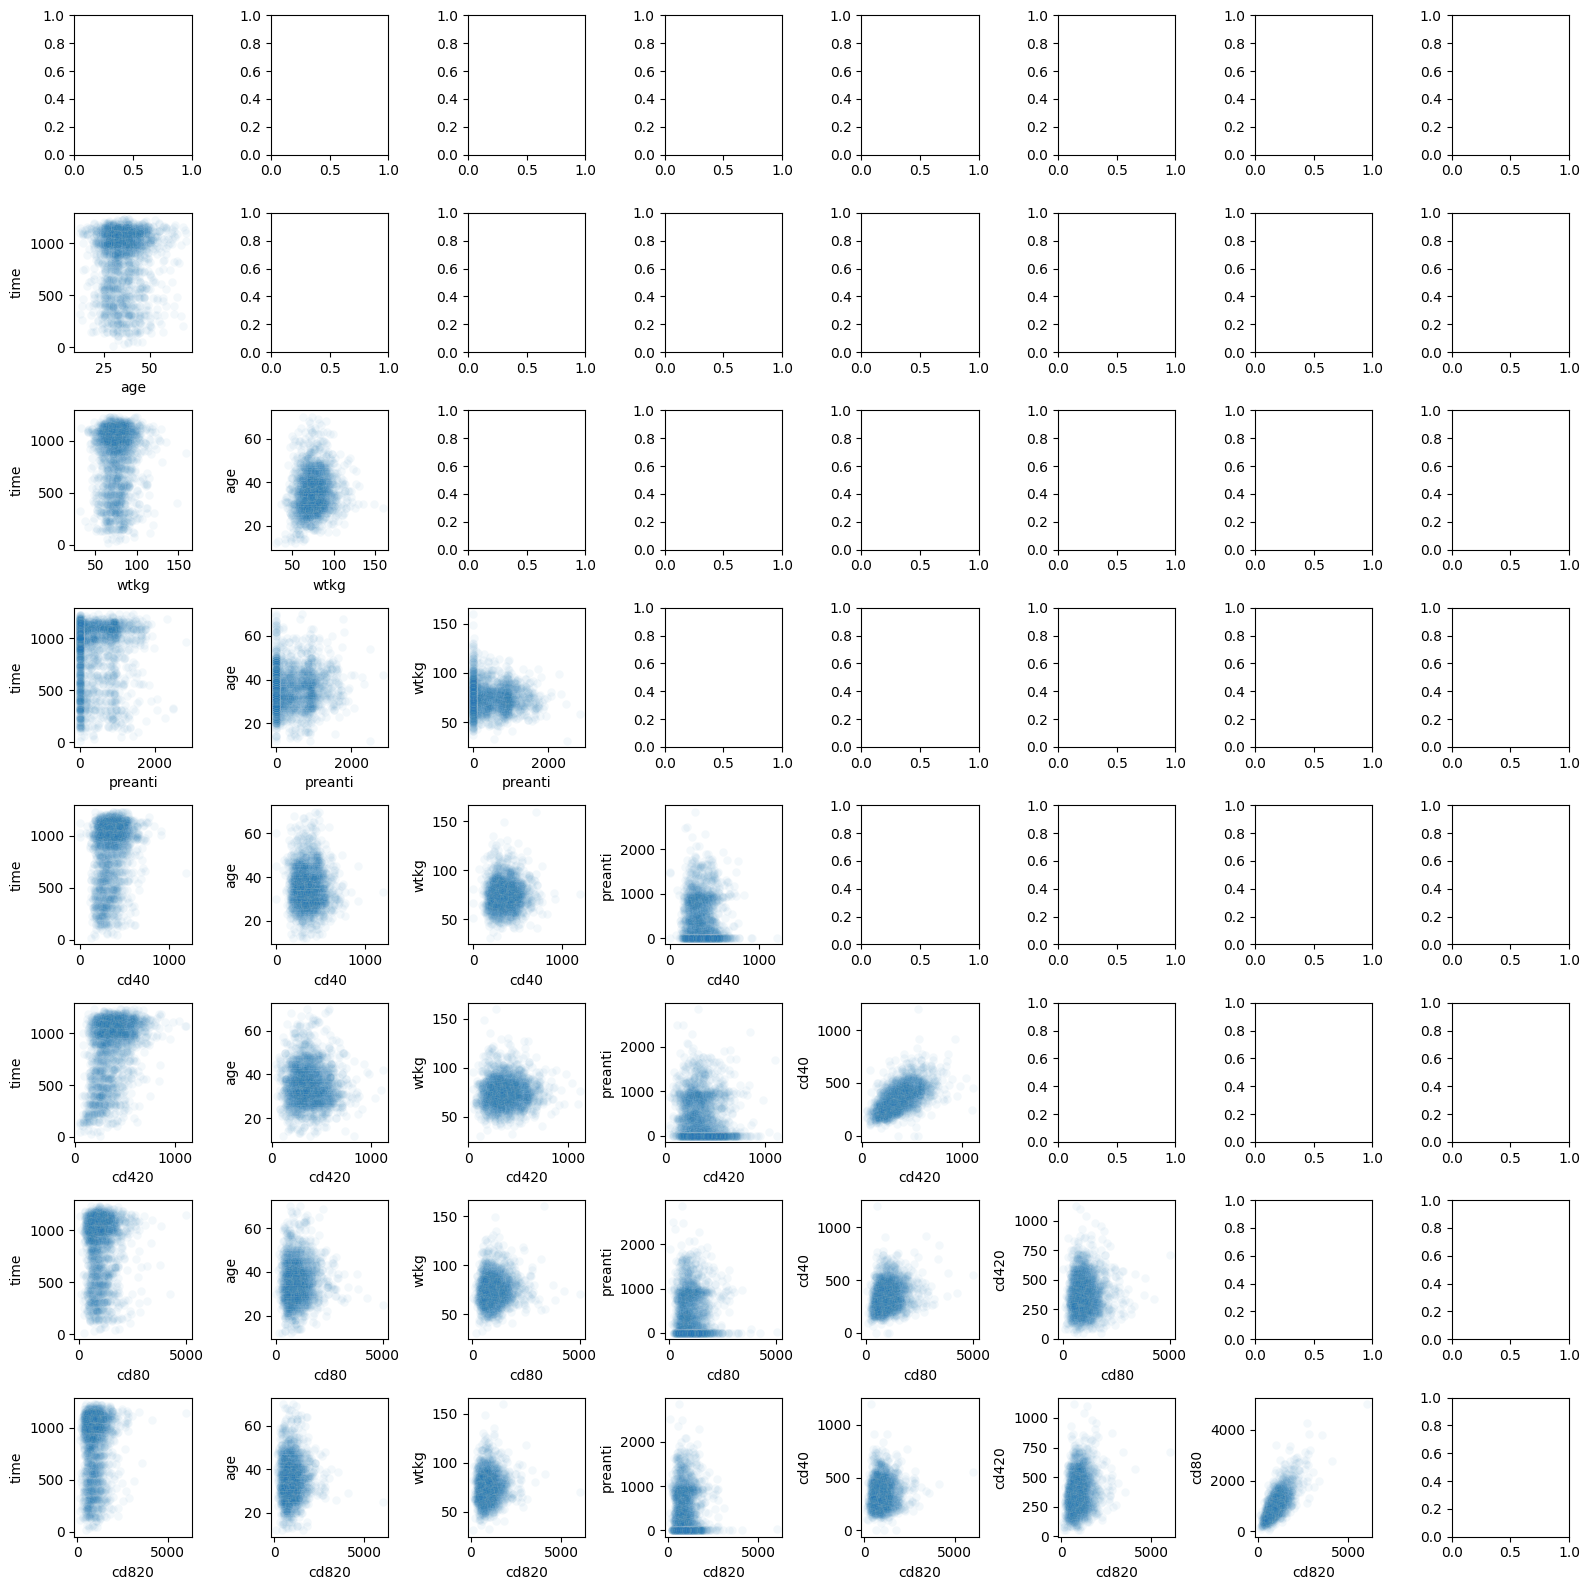

In [ ]:
n_cols = len(df.columns)
fig,ax = plt.subplots(n_cols,n_cols, figsize=(20,20))

df = data[continuous_features]

for i in range(1,n_cols):
    for j in range(i):
        var1 = df.columns[i]
        var2 = df.columns[j]
        ax[i][j].set_xlabel(var1)
        ax[i][j].set_ylabel(var2)
        sns.scatterplot(data = df, x = var1, y = var2,ax = ax[i][j], alpha = 0.05)

plt.tight_layout()
plt.show()

## Outlier cd8 vs infected

- cd80 > 2500 is mildly correlated with infected
- cd820 > 2500 is not

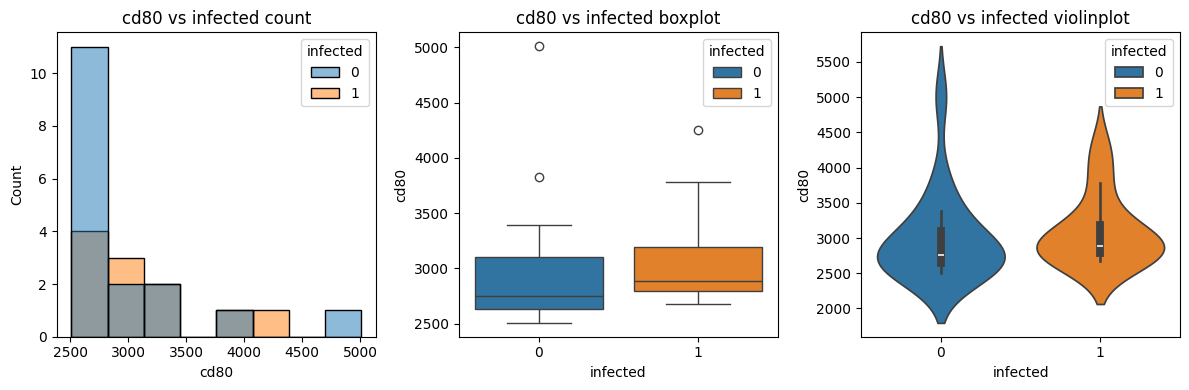

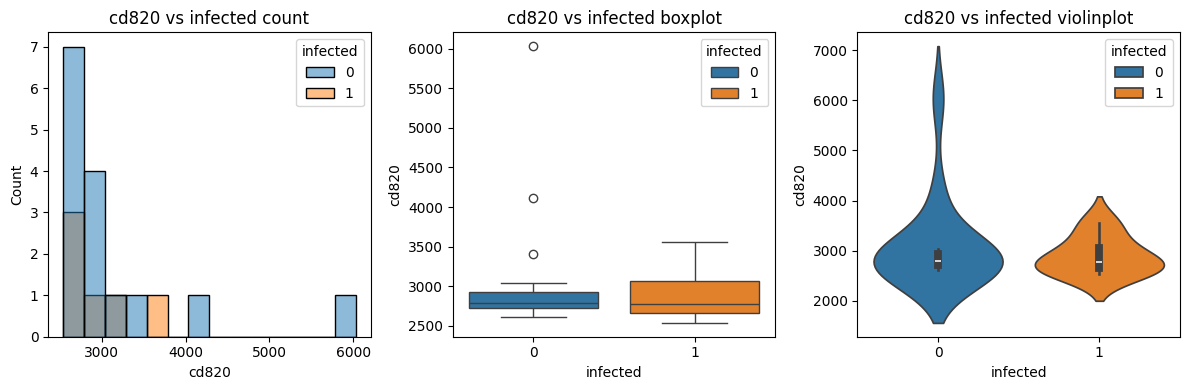

In [2]:
for variable in "cd80 cd820".split():
    fig,axes = plt.subplots(1,3,figsize = (12,4), sharey = False)

    df = data[data[variable]>2500]

    sns.histplot(data = df, x= variable, hue = "infected", ax = axes[0])
    sns.boxplot(data = df, x= "infected", y = variable, hue = "infected", orient = "v", ax = axes[1])
    sns.violinplot(data = df, x= "infected", y = variable, hue = "infected", orient = "v", ax = axes[2])


    axes[0].set_title(f'{variable} vs infected count')
    axes[1].set_title(f'{variable} vs infected boxplot')
    axes[2].set_title(f'{variable} vs infected violinplot')

    plt.tight_layout()
    plt.show()

## Symptoms vs Karnofsky score


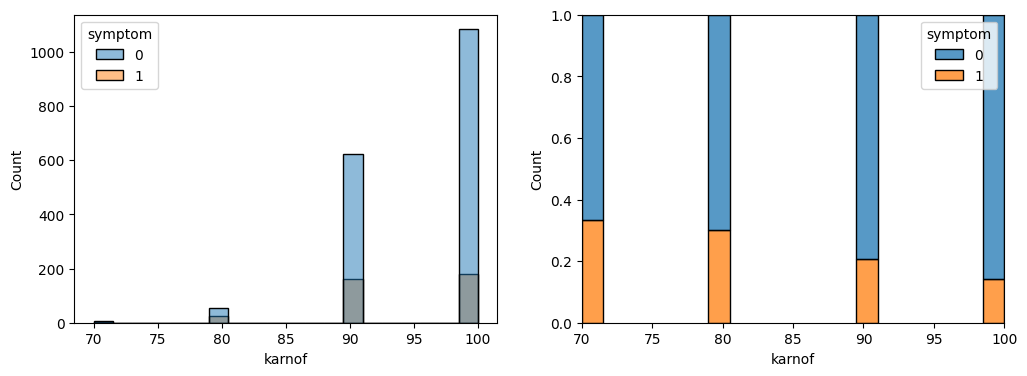

In [3]:
fig, axes = plt.subplots(1,2,figsize = (12,4), sharey=False)
df = data
sns.histplot(data = df, x= "karnof", hue = "symptom", ax = axes[0])
sns.histplot(data = df, x= "karnof", hue = "symptom", multiple = "fill", ax = axes[1])

plt.show()

## Feature engineering


In [4]:
df = data.copy()
plt.rcParams['figure.figsize'] = (4,2)


In [50]:
def plot_correlations(df,columns = None):
    if columns == None:
        columns = df.columns

    correlations = df.corr().loc['infected',columns].sort_values()
    if 'infected' in correlations:
        correlations.drop('infected',inplace = True)
    sns.barplot(data = correlations)
    plt.xticks(rotation=90)
    plt.ylabel ("correlation")
    plt.title("Correlation with target 'infected'")

    plt.show()

from scipy.stats import chi2_contingency

def plot_chi(df,columns):
    results = []

    for feature in columns:
        contingency_table = pd.crosstab(df[feature], df['infected'])
        
        chi2, p, dof, _ = chi2_contingency(contingency_table)
        
        # Append results to the list
        results.append({
            'feature': feature,
            'chi2': chi2,
            'p-value': p
        })

    # Convert results into a DataFrame and print
    results_df = pd.DataFrame(results)
    print(results_df)

    # Plot the results
    plt.figure()
    sns.barplot(data=results_df, x='feature', y='chi2')
    plt.xticks(rotation=90)
    plt.tight_layout()

    plt.show()


### Treatment

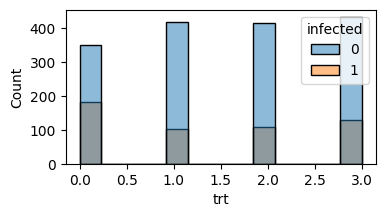

In [45]:
sns.histplot(df, x= 'trt', hue = 'infected')
plt.show()

In [46]:
df = data.copy()
df['trt0'] = (df['trt'] == 0).astype(int) # zdv only
df['trt1'] = (df['trt'] == 1).astype(int) # zdv + ddl
df['trt2'] = (df['trt'] == 2).astype(int) # zdd + zal
df['trt3'] = (df['trt'] == 3).astype(int) # ddl only

df['trtzdv'] = df['trt0'] + df['trt1'] + df['trt2']
df['trtddl'] = df['trt1'] + df['trt3']
df['trtzal'] = df['trt2'] 

#df = df.drop(columns = "treat trt trt0 trt1 trt2 trt3".split(), axis = 1)

#df = df.drop(columns = "treat trt trtzdv trtzal trtddl trt3".split(), axis = 1) #<<<< this



In [51]:
cols = "treat trt trt0 trt1 trt2 trt3 trtzdv trtzal trtddl".split()
plot_chi(df,cols)

KeyError: 'trt0'

### Str and strat

We remove str2, we keep strat, we do not dummy strat

<Axes: xlabel='strat', ylabel='Count'>

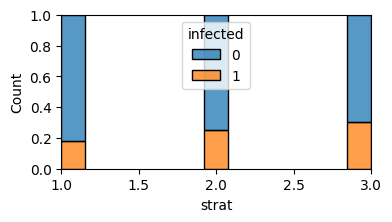

In [27]:
sns.histplot(data,x='strat',hue = "infected", multiple = 'fill')

### z30

<Axes: xlabel='preanti', ylabel='Count'>

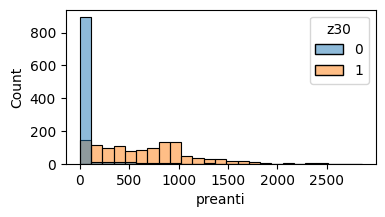

In [92]:
sns.histplot(data,x='preanti', hue = 'z30')

<Axes: xlabel='str2', ylabel='Count'>

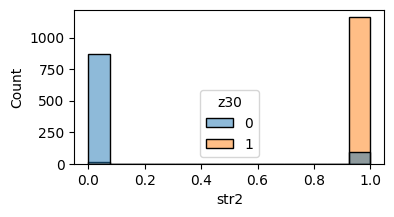

In [95]:
sns.histplot(data,x='str2', hue = 'z30')

### Symptoms



It is best to know Karnof when it is asymptomatic. If it is with symptoms then the karnofsky score does not add info. 

    feature       chi2       p-value
0    karnof  22.843439  4.353388e-05
1   symptom  34.932589  3.413199e-09
2    karsym  36.383430  2.412972e-07
3  karnosym  54.683577  3.784769e-11


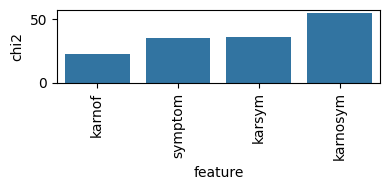

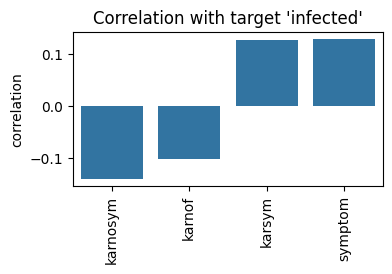

In [75]:
df = data.copy()
df['karsym'] = df['symptom']*(df['karnof'])
df['karnosym'] = (1-df['symptom'])*(df['karnof'])

plot_chi(df,"karnof symptom karsym karnosym".split())
plot_correlations(df,"karnof symptom karsym karnosym".split())


### Homo

homomale is more informative than homo

       feature      chi2   p-value
0         homo  6.037523  0.014005
1       gender  4.080192  0.043389
2     homomale  6.897491  0.008632
3   homofemale  0.689751  0.406249
4    eteromale  1.486314  0.222789
5  eterofemale  3.303812  0.069119
6     homohomo  8.027425  0.018066


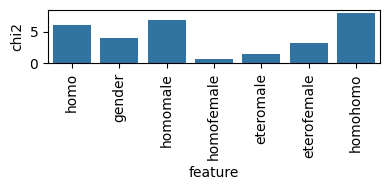

In [91]:
df = data.copy()
df['homomale'] = df['homo']*df['gender']
df['homofemale'] = df['homo']*(1-df['gender'])
df['eteromale'] = (1-df['homo'])*df['gender']
df['eterofemale'] = (1-df['homo'])*(1-df['gender'])
df['homohomo'] = (df['homo'])*(1+df['gender'])


plot_chi(df,"homo gender homomale homofemale eteromale eterofemale homohomo".split())


### cd4 vs logcd4


Not clip, log only 420

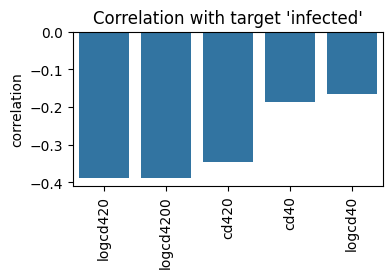

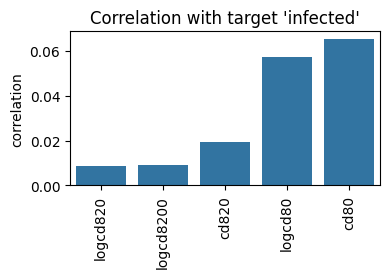

In [63]:
df = data.copy()
df['logcd40'] = np.log(df['cd40']+1)
df['logcd420'] = np.log(df['cd420']+1)
df['logcd4200'] = np.log(df['cd420']+10)

plot_correlations(df,"cd40 cd420 logcd40 logcd420 logcd4200".split())

df['logcd80'] = np.log(df['cd80']+1)
df['logcd820'] = np.log(df['cd820']+1)
df['logcd8200'] = np.log(df['cd820']+10)

plot_correlations(df,"cd80 cd820 logcd80 logcd820 logcd8200".split())

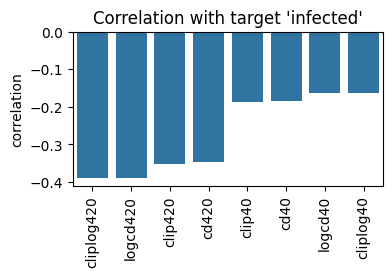

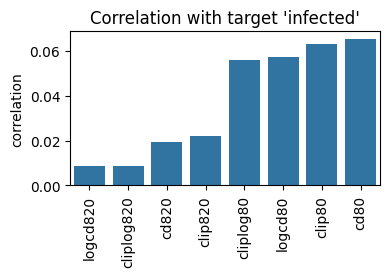

In [66]:
df['clip40'] = df['cd40'].clip(upper = 800)
df['clip420'] = df['cd420'].clip(upper = 800)
df['cliplog40'] = df['logcd40'].clip(upper = np.log(800))
df['cliplog420'] = df['logcd420'].clip(upper = np.log(800))

df['clip80'] = df['cd80'].clip(upper = 2500)
df['clip820'] = df['cd820'].clip(upper = 2500)
df['cliplog80'] = df['logcd80'].clip(upper = np.log(2500))
df['cliplog820'] = df['logcd820'].clip(upper = np.log(2500))

plot_correlations(df,"cd40 clip40 logcd40 cliplog40 cd420 clip420 logcd420 cliplog420".split())
plot_correlations(df,"cd80 clip80 logcd80 cliplog80 cd820 clip820 logcd820 cliplog820".split())

### cdratio

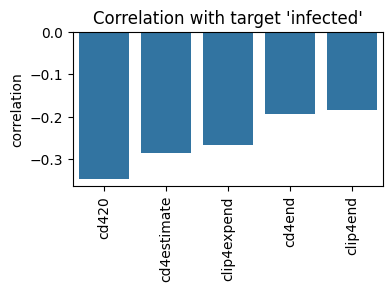

In [87]:
# replace cd40 with cd4end
df = data.copy()
df['cd4ratio'] = df['cd420']/(df['cd40']+1)
df['cd4logratio'] = np.log(df['cd4ratio'])
df['cd4logincrease'] = df['cd4logratio']*df['time']/140  # log multiplier till end
df['cd4end'] = df['cd4logratio']*df['time']/140 + np.log(df['cd40']+1) # log end
df['clip4end'] = df['cd4end'].clip(lower = 0, upper = np.log(800))
df['clip4expend'] = np.exp(df['clip4end'])

# we take the ratio, take log and multiply by time. 
t1 = df['cd40'].clip(upper = 799, lower = 1)
t2 = df['cd420'].clip(upper = 799, lower = 1)

mask0  = (t2 < 800).astype(int)
mask1  = (t1 - t2 >=  0).astype(int) * mask0
mask2  = (t1 - t2 < 0).astype(int) * mask0
mask3  = (t2 >= 800).astype(int)
# case mask1: if 420 < 40 then we exponentially decrease to zero. 
estimate1 = np.exp(np.log(t2/t1) * df['time']/140 + np.log(t1))
# case mask2: if 420 > 40 then we exponentially grow to 800. 
d1 , d2 = 800-t1, 800 - t2 # d1 > d2
estimate2  = 800 - np.exp(np.log(d2/d1) * df['time']/140 + np.log(d1))
# case mask3: if cd420>= 800 then we keep it as an estimate
estimate3 = df['cd420']
#full estimate
df['cd4estimate'] = mask1 * estimate1 + mask2 * estimate2 + mask3 * estimate3

plot_correlations(df, "cd420 cd4estimate clip4expend clip4end cd4end".split())



### Features 


In [ ]:
df = data.copy()
# drop str2
df = df.drop(columns=['str2'])
# replace cd420 with its log counterpart
df['logcd420'] = np.log(df['cd42'])
# replace cd40 with cd4end
df['cd4ratio'] = df['cd420']/(df['cd40']+1)
df['cd4logratio'] = np.log(df['cd4ratio'])
df['cd4end'] = df['cd4logratio']*df['time']/140
df = df.drop(columns=['cd40','cd420','cd4logratio','cd4ratio'])
# replace homo with homo*gender
df['homohomo'] = df['homo']*df['gender']
df = df.drop(columns=['homo'])
#df['timetime'] = np.where(df['time'] < 700, 1, 0)